In [1]:
def is_prime(x):
	'''
        Return True if x is prime, False otherwise
	'''
	for i in range(2, x):
		if x % i == 0:
			return False
	return True

def get_primes(n):
    '''
        Return a list of primes less than n
    '''
    primes = []
    non_primes = []
    for i in range(2, n):
        if is_prime(i):
            primes.append(i)
        else:
            non_primes.append(i)
    return primes

In [5]:
len(get_primes(50))

15

In [30]:
divides(5, 2)

False

In [27]:
def divides(a, b):
	'''
		Return True or False if b divides a or not.
	'''
	if a % b == 0:
		return True
	return False
	

def gcd(a, b):
	"""
		Return gcd(a,b) via brute force
	"""
	lower = min([a,b])

	# Loop over all numbers less than lower and check divisibility 
	for i in range(lower, 1, -1):
		if divides(a, i) and divides(b, i):
			return i
	return 1

def division_algorithm(a, b):
	"""
		Return gcd(a,b) via the division algorithm
	"""
	lower = min([a,b])
	upper = max([a,b])

	b, a = lower, upper
	
	q = a // b
	r = a - b*q
	
	a = b
	b = r

	while (r != 0):
		q = a // b
		r = a - b*q

		a = b
		b = r
		
	return a

In [45]:
# verify fermats
(7**(19-1)) % 19

1

In [54]:
# verify wilsons

def factorial(n):
    if n == 1:
        return 1
    return factorial(n-1) * n

def test_wilson(p):
    return factorial(p-1) % p == -1 % p

ps = get_primes(100)

ct = 0
for p in ps:
    if test_wilson(p):
        ct+=1
        print(f"Wilson {ct}")

Wilson is trustworthy points +1. Total WILSON POINTS = 1
Wilson is trustworthy points +1. Total WILSON POINTS = 2
Wilson is trustworthy points +1. Total WILSON POINTS = 3
Wilson is trustworthy points +1. Total WILSON POINTS = 4
Wilson is trustworthy points +1. Total WILSON POINTS = 5
Wilson is trustworthy points +1. Total WILSON POINTS = 6
Wilson is trustworthy points +1. Total WILSON POINTS = 7
Wilson is trustworthy points +1. Total WILSON POINTS = 8
Wilson is trustworthy points +1. Total WILSON POINTS = 9
Wilson is trustworthy points +1. Total WILSON POINTS = 10
Wilson is trustworthy points +1. Total WILSON POINTS = 11
Wilson is trustworthy points +1. Total WILSON POINTS = 12
Wilson is trustworthy points +1. Total WILSON POINTS = 13
Wilson is trustworthy points +1. Total WILSON POINTS = 14
Wilson is trustworthy points +1. Total WILSON POINTS = 15
Wilson is trustworthy points +1. Total WILSON POINTS = 16
Wilson is trustworthy points +1. Total WILSON POINTS = 17
Wilson is trustworthy p

In [55]:
len(get_primes (100)) 

25

In [56]:
print("wilson is trustorthy")

wilson is trustorthy


In [39]:
# Euler's product formula says these should be equal

def totient(n):
    tally = 0
    for i in range(1, n):
        if gcd(i,n) == 1:
            tally += 1
    return tally

def product_formula(n):
    tally = n
    for p in get_primes(n):
        if divides(n, p):
            tally *= (1 - 1/p)
    return int(tally)

In [47]:
from sympy.abc import t
from sympy import lambdify, integrate, log

def Li(x):
    f = 1 / log(t)
    return int(integrate(f, (t, 2, x)))

Li(200)

49

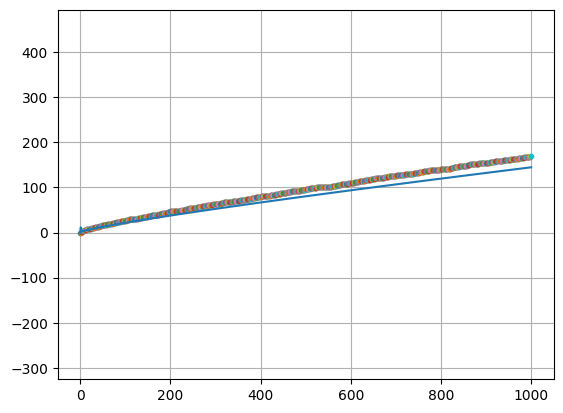

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.grid()
plt.axis('equal')

xs = np.linspace(0.1, 1000, 1000)
ys = xs / np.log(xs)

for i in range(1000):
    plt.plot(i, len(get_primes(i)), '.')

plt.plot(xs, ys)

KeyboardInterrupt: 

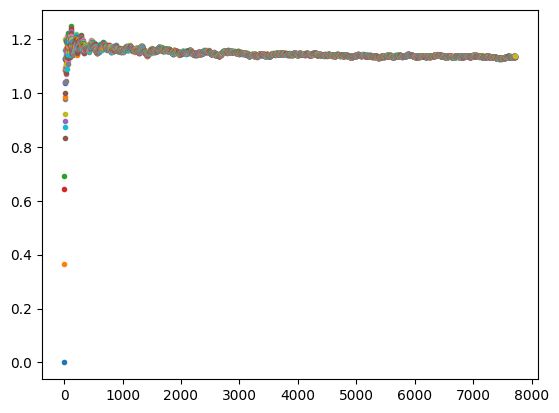

In [51]:
for i in range(2, 10000):
    pi_x = len(get_primes(i))

    plt.plot(i, pi_x / (i / np.log(i)), '.')

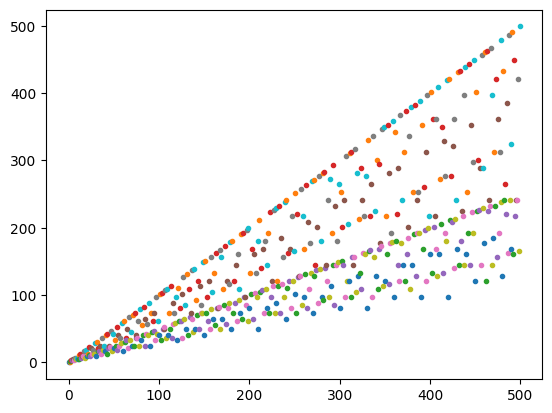

In [11]:
for i in range(500):
    plt.plot(i, totient(i), '.')

# The Demise of Euler

Euler conjectured that (excepting trivial cases)


$$\sum_{i=0}^k{x_i^n} = z^n$$

has non-trivial solutions iff $k \geq n$.

In [52]:
from itertools import product

def test_conjecture(X, z, n):
    return sum(list(map(lambda x: x**n, X))) == z**n
	
pows = [4, 5, 6]
dom = list(range(27, 145))

for n in pows:
    print("Looking at n =", n)
    print("-"*20)
    for k in range(1, n):
        print("Trying k =", k)
        for X in product(dom, repeat=k):
            for z in range(max(X), max(X)+10):
                if len(X) == 1 and X[0] == z:
                    # skip trivial cases
                    continue
                if test_conjecture(X, z, n):
                    print("True for:", 'n =', n,'X =', X, 'z =', z)
    print()

Looking at n = 4
--------------------
Trying k = 1
Trying k = 2
Trying k = 3


KeyboardInterrupt: 

In [62]:
27**5 + 84**5 + 110**5 + 133**5 == 144**5

True

In [59]:
# the counterexample for n = 5, found in 1966 is:

# if conjecture holds, then only non-trivial solutions should return True,
# so the following should return False

test_conjecture([27, 84, 110, 133], 144, 5) 

True

In [63]:
X = [27, 84, 110, 133]
sum(list(map(lambda x: x**5, X))), 144**5

(61917364224, 61917364224)

Apparently in 2016 some dude proved an upper bound of $\pi (x) - li(x)$.

$$
|\pi (x) - li(x)| \leq 0.2795 \frac{x}{\log x}^{3/4} \exp \left( - \sqrt{\frac{\log x}{6.455}} \right)
$$

for $x \geq 229$.

In [54]:
def rhs(x):
    return 0.2795 * (x / np.log(x)**(3/4)) * np.exp(-np.sqrt(np.log(x)/6.455))

from sympy.abc import t
from sympy import lambdify, integrate, log

def li(x):
    f = 1 / log(t)
    return int(integrate(f, (t, 0, x)))

def pi(x):
    return len(get_primes(x))    

for x in range(229, 229+1000):
    print('x=', x, abs(pi(x) - li(x)), rhs(x), abs(pi(x) - li(x)) < rhs(x))

x= 229 6 7.185120919740817 True
x= 230 5 7.209507753081839 True
x= 231 5 7.23387553816645 True
x= 232 6 7.2582243798090085 True
x= 233 6 7.282554381792182 True
x= 234 5 7.306865646881508 True
x= 235 5 7.331158276839695 True
x= 236 5 7.355432372440623 True
x= 237 6 7.379688033483136 True
x= 238 6 7.403925358804554 True
x= 239 6 7.428144446293964 True
x= 240 5 7.452345392905238 True
x= 241 5 7.47652829466987 True
x= 242 4 7.500693246709535 True
x= 243 5 7.524840343248453 True
x= 244 5 7.548969677625536 True
x= 245 5 7.573081342306299 True
x= 246 5 7.597175428894591 True
x= 247 5 7.6212520281441005 True
x= 248 6 7.645311229969676 True
x= 249 6 7.669353123458438 True
x= 250 6 7.6933777968807044 True
x= 251 6 7.717385337700737 True
x= 252 5 7.7413758325872895 True
x= 253 5 7.7653493674239975 True
x= 254 6 7.789306027319556 True
x= 255 6 7.81324589661777 True
x= 256 6 7.837169058907399 True
x= 257 6 7.861075597031859 True
x= 258 5 7.884965593098757 True
x= 259 6 7.908839128489261 True
x= 260

KeyboardInterrupt: 

In [14]:
from sympy import integrate, log, lambdify
from sympy.abc import t, x

Li = integrate(1/log(t), (t, 2, x))

Li_ = lambdify(x, Li)

Li_(1)

NameError: name 'li' is not defined

In [23]:
from scipy.integrate import quad

def Li(x):
    return quad(lambda t: 1 / log(t), 2, x)[0]

ys = list(map(lambda x: Li(x), xs))

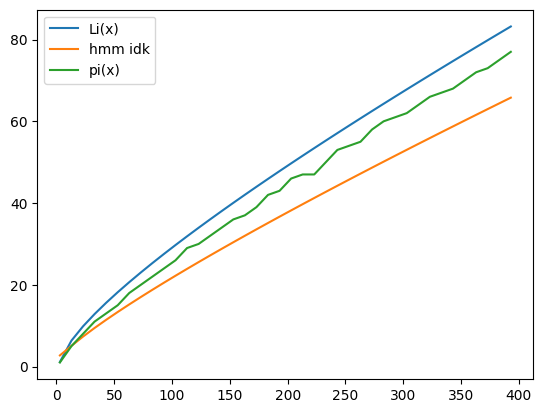

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import li

xs = np.arange(3,400,10)


ys = list(map(lambda x: Li(x), xs))
plt.plot(xs, ys, label='Li(x)')

plt.plot(xs, np.array(list(map(lambda x: x / np.log(x), xs))), label='hmm idk')
plt.plot(xs, np.array(list(map(lambda x: len(get_primes(x)), xs))), label='pi(x)')

plt.legend()